In [1]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_circles
# Generate data with make_circles
np. random . seed (5)
X, y = make_circles ( n_samples =500 , factor =0.3 , noise =0.1)

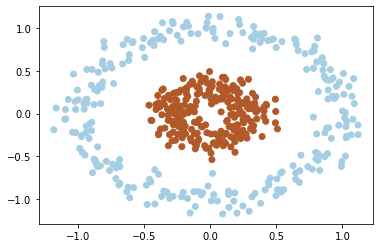

In [2]:
plt.scatter (X [:, 0], X [:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

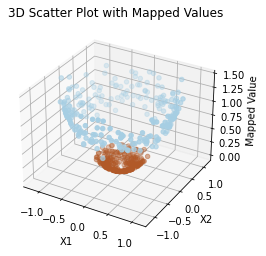

In [3]:
def mappingKernel(x1, x2):
    return x1, x2, x1**2 + x2**2

# X and y are defined before this code snippet
# X should be a numpy array with shape (n_samples, 2) and y a 1D array of labels

mappedx_1, mappedy_1, mappedz_1 = mappingKernel(X[:, 0], X[:, 1])

# Visualize in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mappedx_1, mappedy_1, mappedz_1, c=y, cmap=plt.cm.Paired)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Mapped Value')
ax.set_title('3D Scatter Plot with Mapped Values')
plt.show()

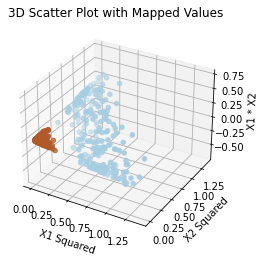

In [4]:
def mappingKernel(x1, x2):
    return x1**2, x2**2, x1*x2

mappedx_2, mappedy_2, mappedz_2 = mappingKernel(X[:, 0], X[:, 1])

# Visualize in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mappedx_2, mappedy_2, mappedz_2, c=y, cmap=plt.cm.Paired)
ax.set_xlabel('X1 Squared')
ax.set_ylabel('X2 Squared')
ax.set_zlabel('X1 * X2')
ax.set_title('3D Scatter Plot with Mapped Values')
plt.show()

Accuracy: 0.45
F1 score: 0.6206896551724138


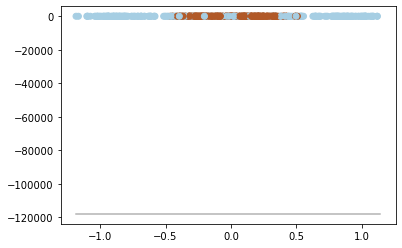

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import sklearn.svm as svm


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the Support Vector Classification (SVC) class with a linear kernel
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the model using metrics such as accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 score:", f1)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

xx = np.linspace(X.min(), X.max(), 50)
yy = (svm_classifier.intercept_ - svm_classifier.coef_[0][0] * xx) / svm_classifier.coef_[0][1]
plt.plot(xx, yy, alpha=0.3, color='black')

plt.show()



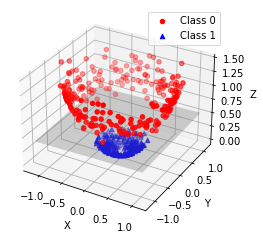

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [6]:
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import  precision_score, recall_score


# Create a linear SVM
svm_classifier = SVC(kernel='linear')

# Use the mapped 3-dimensional data
mapped_data = np.column_stack((mappedx_1, mappedy_1, mappedz_1))

# Split the test and training data sets
X_train, X_test, y_train, y_test = train_test_split(mapped_data, y, test_size=0.2)

# Fit the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions using the model
y_pred = svm_classifier.predict(X_test)

# Visualize the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(mappedx_1[y == 0], mappedy_1[y == 0], mappedz_1[y == 0], color='r', marker='o', label='Class 0')
ax.scatter(mappedx_1[y == 1], mappedy_1[y == 1], mappedz_1[y == 1], color='b', marker='^', label='Class 1')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(mappedx_1.min(), mappedx_1.max(), 50),
                     np.linspace(mappedy_1.min(), mappedy_1.max(), 50))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0][0] * xx - svm_classifier.coef_[0][1] * yy) / svm_classifier.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()

# Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))


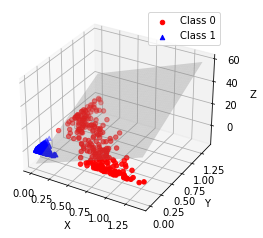

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [7]:

# Create a linear SVM
svm_classifier = SVC(kernel='linear')

# Use the mapped 3-dimensional data
mapped_data = np.column_stack((mappedx_2, mappedy_2, mappedz_2))

# Split the test and training data sets
X_train, X_test, y_train, y_test = train_test_split(mapped_data, y, test_size=0.2)

# Fit the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Visualize the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(mappedx_2[y == 0], mappedy_2[y == 0], mappedz_2[y == 0], color='r', marker='o', label='Class 0')
ax.scatter(mappedx_2[y == 1], mappedy_2[y == 1], mappedz_2[y == 1], color='b', marker='^', label='Class 1')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(mappedx_2.min(), mappedx_2.max(), 50),
                     np.linspace(mappedy_2.min(), mappedy_2.max(), 50))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0][0] * xx - svm_classifier.coef_[0][1] * yy) / svm_classifier.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()

# Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

